### Student Information
Name: 姚瀚宇

Student ID: 110062542

GitHub ID: 51129597

Kaggle name: hanyuyao

Kaggle private scoreboard snapshot:

[Snapshot](pic0.png)

### Kaggle Competition - part1

### Read data and plot statistical figures

#### 1. Read data_identification.csv

In [1]:
import pandas as pd

train_test = pd.read_csv("data_identification.csv")
train_test

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [2]:
train_test.identification.value_counts()

train    1455563
test      411972
Name: identification, dtype: int64

#### Plot train test distribution

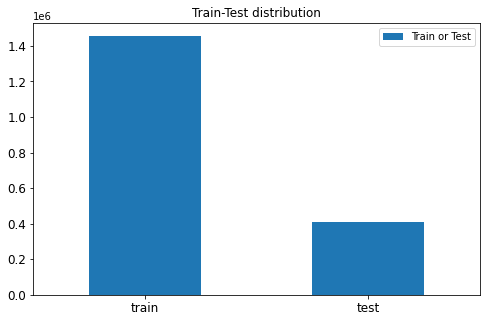

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

df_bar = pd.DataFrame({'Train or Test': train_test.identification.value_counts()},
                        index=['train', 'test'])

ax = df_bar.plot(kind = 'bar',
                title = 'Train-Test distribution',       
                rot = 0, fontsize = 12, figsize = (8,5))

#### 2. Read emotion.csv

In [4]:
label = pd.read_csv("emotion.csv")
label

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


#### Count label occurrences

In [5]:
label.emotion.value_counts()

joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: emotion, dtype: int64

#### Plot label distribution

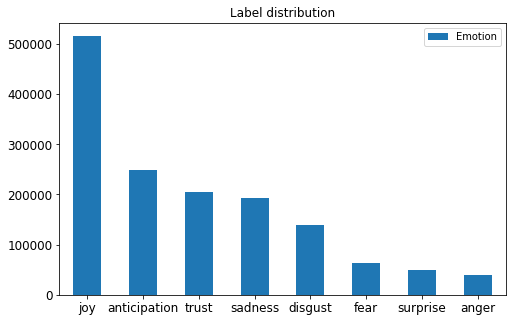

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

df_bar = pd.DataFrame({'Emotion': label.emotion.value_counts()},
                        index=['joy', 'anticipation', 'trust', 'sadness', 'disgust', 'fear', 'surprise', 'anger'])

ax = df_bar.plot(kind = 'bar',
                title = 'Label distribution',       
                rot = 0, fontsize = 12, figsize = (8,5))

#### 3. Read tweets_DM.json

In [7]:
import json 

tweets = []
for line in open('tweets_DM.json', 'r'):
    tweets.append(json.loads(line))

print(type(tweets[0]))

<class 'dict'>


#### Transform time to seconds

In [8]:
t = tweets[10]['_crawldate'][-8:]
print(t)
print(int(t[:2])*3600 + int(t[3:5])*60 + int(t[6:]))

21:15:36
76536


#### Construct a dataframe of the data

In [9]:
data = {}

# tweet_id
data['tweet_id'] = [tweet['_source']['tweet']['tweet_id'] for tweet in tweets]
# text
data['text'] = [tweet['_source']['tweet']['text'] for tweet in tweets]
# score
data['score'] = [tweet['_score'] for tweet in tweets]
# time
time = [tweets[i]['_crawldate'][-8:] for i in range(len(tweets))]
data['time'] = [int(t[:2])*3600 + int(t[3:5])*60 + int(t[6:]) for t in time]

df = pd.DataFrame(data)
df

,tweet_id,text,score,time
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",391,42167
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",433,17529
2,0x28b412,"Confident of your obedience, I write to you, k...",232,16760
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,376,85985
4,0x2de201,"""Trust is not the same as faith. A friend is s...",989,62339
...,...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,827,46312
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,368,64444
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,498,39872
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",840,51906


#### See some data

In [10]:
df['text'][3]

'Now ISSA is stalking Tasha 😂😂😂 <LH>'

In [11]:
'😂' in df['text'][3]

True

### Data prepocessing

#### 1. Construct training data and testing data

#### Dictionary to see a tweet is training data or testing data

In [12]:
train_or_test = {}

for i in range(len(train_test)):
    train_or_test[train_test['tweet_id'][i]] = train_test['identification'][i]

#### Dictionary to see what is the emotion of the tweet

In [13]:
emotion = {}

for i in range(len(label)):
    emotion[label['tweet_id'][i]] = label['emotion'][i]

In [14]:
# construct training data and testing data
train_id = []
train_text = []
train_label = []

test_id = []
test_text = []

for i in range(len(df)):
    ID = df['tweet_id'][i]
    if train_or_test[ID]=='train':
        train_id.append(ID)
        train_text.append(df['text'][i])
        train_label.append(emotion[ID])
    else:
        test_id.append(ID)
        test_text.append(df['text'][i])

df_train = pd.DataFrame({'tweet_id':train_id, 'text':train_text, 'emotion':train_label})
df_test = pd.DataFrame({'tweet_id':test_id, 'text':test_text})

#### Training data

In [15]:
df_train

,tweet_id,text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,joy
1455560,0x2cbca6,there's currently two girls walking around the...,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


#### Testing data

In [16]:
df_test

,tweet_id,text
0,0x28b412,"Confident of your obedience, I write to you, k..."
1,0x2de201,"""Trust is not the same as faith. A friend is s..."
2,0x218443,When do you have enough ? When are you satisfi...
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
4,0x26289a,"In these tough times, who do YOU turn to as yo..."
...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th..."
411968,0x2a980e,"""There is a lad here, which hath five barley l..."
411969,0x316b80,When you buy the last 2 tickets remaining for ...
411970,0x29d0cb,I swear all this hard work gone pay off one da...


#### 2. Preprocessing function to remove stop words, remove HTML tags, remove numbers, remove accented characters, remove special characters, remove extra white spaces and tabs, remove punctuation marks but emoticons, convert all characters to lowercase, and apply snowball stemmer. (details are in the comments of the below cell)

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
from bs4 import BeautifulSoup
import unicodedata
import string

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
stemmer = SnowballStemmer("english")

def preprocess(text, stem=True):
    # remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    # regex for matching emoticons, keep emoticons, ex: :), :-P, :-D
    r = '(?::|;|=|X)(?:-)?(?:\)|\(|D|P)'
    emoticons = re.findall(r, text)
    text = re.sub(r, ' ', text)
    
    # regex for matching emojis, keep emojis
    r = u'['u'\U0001F300-\U0001F64F'u'\U0001F680-\U0001F6FF'u'\u2600-\u26FF\u2700-\u27BF]+'
    emojis = re.findall(r, text)
    text = re.sub(r, ' ', text)
    
    # remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # convert to lowercase
    text = re.sub('[\W]+', ' ', text.lower())
    
    # remove numbers
    text = re.sub(r'[^a-zA-z.,!?/:;\"\'\s]', ' ', text)
    
    # remove punctuation
    text = ''.join([c for c in text if c not in string.punctuation])
    
    # remove special characters
    text = re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]', '', text)
    
    # remove extra white spaces and tabs
    re.sub(r'^\s*|\s\s*', ' ', text).strip()
    
    tokens = []
    for token in re.split('\s+', text.strip()):
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
                
    # append all emoticons and emojis behind the text (with space in between)
    # replace('-','') removes nose of emoticons
    
    new_text = " ".join(tokens)
    if len(emoticons) != 0:
        new_text = new_text + ' ' + ' '.join(emoticons).replace('-','')
    if len(emojis) != 0:
        new_text = new_text + ' ' + ' '.join(emojis)
    return new_text


[nltk_data] Downloading package stopwords to /home/allen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
preprocess('%$Some #example\U0001f62atext with333 :-Da sleepy face: \U0001f62a')

'exampl text sleepi face :D 😪 😪'

#### Apply preprocessing function on training data

In [23]:
df_train.text = df_train.text.apply(lambda x: preprocess(x))
df_train

,tweet_id,text,emotion
0,0x376b20,peopl post add snapchat must dehydr cuz man,anticipation
1,0x2d5350,brianklaa see trump danger freepress around wo...,sadness
2,0x1cd5b0,issa stalk tasha 😂😂😂,fear
3,0x1d755c,riskshow thekevinallison thx best time tonight...,joy
4,0x2c91a8,still wait suppli liscus,anticipation
...,...,...,...
1455558,0x321566,happi nowond name show happi happysyfi syfi ch...,joy
1455559,0x38959e,everi circumt like thank almighti jesus christ,joy
1455560,0x2cbca6,current two girl walk around librari hand red ...,joy
1455561,0x24faed,ah corpor life date use relat anachron last jo...,joy


#### Apply preprocessing function on testing data

In [24]:
df_test.text = df_test.text.apply(lambda x: preprocess(x))
df_test

,tweet_id,text
0,0x28b412,confid obedi write know even ask philemon bibl...
1,0x2de201,trust faith friend someon trust put faith anyo...
2,0x218443,enough satisfi goal realli money materi money ...
3,0x2939d5,god woke chase day godsplan godswork
4,0x26289a,tough time turn symbol hope
...,...,...
411967,0x2913b4,messag ye heard begin love one anoth john kjv
411968,0x2a980e,lad hath five barley loav two small fish among...
411969,0x316b80,buy last ticket remain show sell mixedfeel but...
411970,0x29d0cb,swear hard work gone pay one day 😈💰💸


#### 3. Data exploration: Word cloud for the emotion "joy"

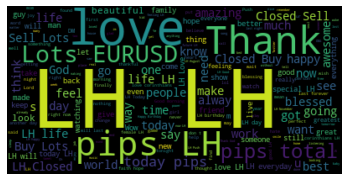

In [17]:
from wordcloud import WordCloud

joy = " ".join(df_train['text'][i] for i in range(len(df_train)) if df_train['emotion'][i]=='joy')
wordcloud2 = WordCloud().generate(joy)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

### Try different models

#### First of all, split training dataset to training data and validation data

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    df_train['text'], df_train['emotion'], test_size=0.25, random_state=42)

In [26]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(1091672,)
(363891,)
(1091672,)
(363891,)


#### 1. Logistic regression  (TF-IDF feature)

In [28]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Train
clf = Pipeline([('vect', TfidfVectorizer(tokenizer=nltk.word_tokenize)),
                 ('clf', LogisticRegression(max_iter=10000,
                                            tol=1e-4, 
                                            C=1.5,
                                            multi_class='multinomial', 
                                            verbose=1,
                                           ))])
clf.fit(X_train, y_train)

# Predict
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 26.2min finished


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('training accuracy: {}'.format(round(acc_train, 4)))
print('validation accuracy: {}'.format(round(acc_val, 4)))

# f1-score
labels = ['joy', 'anticipation', 'trust', 'sadness', 'disgust', 'fear', 'surprise', 'anger']
f1_train = f1_score(y_true=y_train, y_pred=y_train_pred, average='macro', labels=labels)
f1_val = f1_score(y_true=y_val, y_pred=y_val_pred, average='macro', labels=labels)

print('training f1-score: {}'.format(round(f1_train, 4)))
print('validation f1-score: {}'.format(round(f1_val, 4))) 

training accuracy: 0.6592
validation accuracy: 0.5543
training f1-score: 0.5757
validation f1-score: 0.4681


#### 2. Naive Bayes (TF-IDF feature)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Train
clf = Pipeline([('vect', TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)),
                 ('clf', MultinomialNB())])
clf.fit(X_train, y_train)

# Predict
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)  

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('training accuracy: {}'.format(round(acc_train, 4)))
print('validation accuracy: {}'.format(round(acc_val, 4)))

# f1-score
f1_train = f1_score(y_true=y_train, y_pred=y_train_pred, average='macro')
f1_val = f1_score(y_true=y_val, y_pred=y_val_pred, average='macro')

print('training f1-score: {}'.format(round(f1_train, 4)))
print('validation f1-score: {}'.format(round(f1_val, 4))) 

training accuracy: 0.4674
validation accuracy: 0.4661
training f1-score: 0.3023
validation f1-score: 0.2997


#### 3. SGD (TF-IDF feature)

In [33]:
import numpy as np
from sklearn.linear_model import SGDClassifier

# Train
clf = Pipeline([('vect', TfidfVectorizer(tokenizer=nltk.word_tokenize)),
                 ('clf', SGDClassifier(max_iter=10000, tol=1e-3))])
clf.fit(X_train, y_train)

# Predict
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val) 

# Predict
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('training accuracy: {}'.format(round(acc_train, 4)))
print('validation accuracy: {}'.format(round(acc_val, 4)))

# f1-score
f1_train = f1_score(y_true=y_train, y_pred=y_train_pred, average='macro')
f1_val = f1_score(y_true=y_val, y_pred=y_val_pred, average='macro')

print('training f1-score: {}'.format(round(f1_train, 4)))
print('validation f1-score: {}'.format(round(f1_val, 4))) 

training accuracy: 0.5596
validation accuracy: 0.5189
training f1-score: 0.4818
validation f1-score: 0.4081


#### 4. SVM  (TF-IDF feature)

In [ ]:
from sklearn.svm import SVC

# Train
clf = Pipeline([('vect', TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)),
                 ('clf', SVC(C=1, gamma='auto'))])
clf.fit(X_train, y_train)

# Predict
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val) 

# Predict
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('training accuracy: {}'.format(round(acc_train, 4)))
print('validation accuracy: {}'.format(round(acc_val, 4)))

# f1-score
f1_train = f1_score(y_true=y_train, y_pred=y_train_pred, average='macro')
f1_val = f1_score(y_true=y_val, y_pred=y_val_pred, average='macro')

print('training f1-score: {}'.format(round(f1_train, 4)))
print('validation f1-score: {}'.format(round(f1_val, 4))) 

#### Here I tried four different models on TF-IDF features. 

- Logistic regression.
- Naive Bayes.
- SGD.
- SVM. 

#### Since the dimension of dataset is high, SVM takes a long time to train, and I stop it manually after waiting for many hours. The best result I've got is from Logistic regression, the validation f1-score is 0.4681. This score is gotten after a lot of try and error on the hyperparamters, and keep adding more data preprocesing steps. Naive Bayes seems to work really bad for this task, and f1-score of SGD is a little smaller than f1-score of Logistic regression. My final score on the private leaderboard is the result of Logistic regression with TF-IDF features.

### Write result to file

In [35]:
test_pred = clf.predict(df_test['text'])
test_pred

array(['anticipation', 'anticipation', 'joy', ..., 'sadness', 'joy',
       'sadness'], dtype='<U12')

In [36]:
import csv

with open('./output/output.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['id', 'emotion'])
    
    for i in range(len(df_test)):
        writer.writerow([df_test['tweet_id'][i], test_pred[i]])

### Word2Vec
#### Below I tried to use word2vec to transform words into word embeddings, combine these word vectors to be the features. However, the result is much worser than TF-IDF feature. I think simple averaging is not suitable for semtiment analysis because it doesn't consider the order of words. However, I didn't have more time for trying other methods, so the result below is not used in the final result.

In [37]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## the input type
df_train['text_tokenized'] = df_train['text'].apply(lambda x: nltk.word_tokenize(x))
df_train

,tweet_id,text,emotion,text_tokenized
0,0x376b20,peopl post add snapchat must dehydr cuz man,anticipation,"[peopl, post, add, snapchat, must, dehydr, cuz..."
1,0x2d5350,brianklaa see trump danger freepress around wo...,sadness,"[brianklaa, see, trump, danger, freepress, aro..."
2,0x1cd5b0,issa stalk tasha 😂😂😂,fear,"[issa, stalk, tasha, 😂😂😂]"
3,0x1d755c,riskshow thekevinallison thx best time tonight...,joy,"[riskshow, thekevinallison, thx, best, time, t..."
4,0x2c91a8,still wait suppli liscus,anticipation,"[still, wait, suppli, liscus]"
...,...,...,...,...
1455558,0x321566,happi nowond name show happi happysyfi syfi ch...,joy,"[happi, nowond, name, show, happi, happysyfi, ..."
1455559,0x38959e,everi circumt like thank almighti jesus christ,joy,"[everi, circumt, like, thank, almighti, jesus,..."
1455560,0x2cbca6,current two girl walk around librari hand red ...,joy,"[current, two, girl, walk, around, librari, ha..."
1455561,0x24faed,ah corpor life date use relat anachron last jo...,joy,"[ah, corpor, life, date, use, relat, anachron,..."


In [38]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [39]:
w2v_google_model['happy'].shape

(300,)

In [40]:
(w2v_google_model['happy']+w2v_google_model['angry']).shape

(300,)

#### Function for convert word list into word embeddings. Use simple average to construct the word vectors.

In [41]:
import numpy as np

def convert_to_vector(word_lst):
    x = np.zeros((300,))
    for word in word_lst:
        try:
            x += w2v_google_model[word]
        except: 
            continue
    x /= len(word_lst)
    return x

#### Apply the above function on the tokenized input text.

In [42]:
df_train['vector'] = df_train['text_tokenized'].apply(lambda x: convert_to_vector(x))

In [43]:
df_train['vector'][0].shape

(300,)

#### Split the training dataset into training data and validation data.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    df_train['vector'], df_train['emotion'], test_size=0.25, random_state=42)

tmp = []
for x in X_train:
    tmp.append(x)
X_train = np.array(tmp)
X_train = np.nan_to_num(X_train)

tmp = []
for x in X_val:
    tmp.append(x)
X_val = np.array(tmp)
X_val = np.nan_to_num(X_val)

y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
print(X_train.shape)
print(X_val.shape)

(1091672, 300)
(363891, 300)


#### Observe the range of the transformed data.

In [45]:
print(np.amin(np.amin(X_train, axis=0)))
print(np.amin(np.amin(X_val, axis=0)))
print(np.amin(np.amax(X_train, axis=0)))
print(np.amin(np.amax(X_val, axis=0)))

-0.98828125
-0.91796875
0.3515625
0.322265625


#### Perform feature transformation to make range of data falls in [0,1].

In [46]:
X_train = (X_train+1)/2
X_val = (X_val+1)/2

print(np.amin(np.amin(X_train, axis=0)))
print(np.amin(np.amin(X_val, axis=0)))
print(np.amin(np.amax(X_train, axis=0)))
print(np.amin(np.amax(X_val, axis=0)))

0.005859375
0.041015625
0.67578125
0.6611328125


#### Train model on word2vec features

In [47]:
from sklearn.naive_bayes import MultinomialNB

# Train model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('training accuracy: {}'.format(round(acc_train, 4)))
print('validation accuracy: {}'.format(round(acc_val, 4)))

# f1-score
f1_train = f1_score(y_true=y_train, y_pred=y_train_pred, average='macro')
f1_val = f1_score(y_true=y_val, y_pred=y_val_pred, average='macro')

print('training f1-score: {}'.format(round(f1_train, 4)))
print('validation f1-score: {}'.format(round(f1_train, 4)))

training accuracy: 0.3547
validation accuracy: 0.354
training f1-score: 0.0655
validation f1-score: 0.0655


#### As I mentioned before, I didn't use this result in my final result.

### Note: the second part of kaggle competition is in DM2021-Lab2-Homework-kaggle-LSTM.ipynb